In [1]:
import we_panic_utils.nn.data_load as dl
import we_panic_utils.nn.processing as p
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import site

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test, val = dl.create_train_test_split_dataframes('rsz', 'subject_data.csv', 'boop')
gen_gray = p.FrameProcessor(batch_size=2, greyscale_on=True).testing_generator_v3(val)
gen_color = p.FrameProcessor(batch_size=2, greyscale_on=False).testing_generator_v3(val)

[check_exists_create_if_not] making a dir: boop


In [3]:
val

,Subject,Trial,Path,Heart Rate,Respiratory Rate
6,8,2,rsz/S0008/Trial2_frames,84.0,12.000000
135,a208,2,rsz/Sa208/Trial2_frames,168.0,42.000000
136,b208,2,rsz/Sb208/Trial2_frames,140.0,35.000000
137,c208,2,rsz/Sc208/Trial2_frames,120.0,30.000000
138,d208,2,rsz/Sd208/Trial2_frames,105.0,26.250000
139,e208,2,rsz/Se208/Trial2_frames,93.3,23.333333
140,f208,2,rsz/Sf208/Trial2_frames,70.0,17.500000
141,g208,2,rsz/Sg208/Trial2_frames,60.0,15.000000
142,h208,2,rsz/Sh208/Trial2_frames,52.5,13.125000
143,i208,2,rsz/Si208/Trial2_frames,46.7,11.666667


In [4]:
imgs_gray = next(gen_gray)[0][0]
imgs_color = next(gen_color)[0][0]

In [5]:
imgs_gray.shape

(60, 100, 100, 1)

In [8]:
nb_frames = 1
def show_frame(num, grays, colors):
    current = grays[num]
    print(num)
    imgg = np.reshape(current, (100, 100))
    plt.imshow(np.asarray(imgg), cmap='gray')

0
0
0


<Figure size 432x288 with 0 Axes>

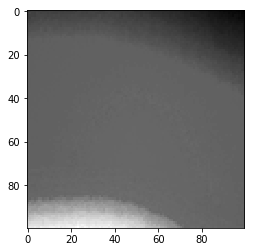

In [9]:
plt.clf()
fig = plt.figure()
anim = animation.FuncAnimation(fig,
                              show_frame,
                              nb_frames,
                              fargs=(imgs_gray, imgs_color))
anim.save('animation.mp4', writer='ffmpeg', dpi=600, fps=6)